# Computer Vision and Convolutional Neural Network

## What we're going to cover



We're going to apply the PyTorch Workflow we've been learning in the past couple of sections to computer vision.

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Computer vision libraries in PyTorch** | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| **1. Load data** | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Prepare data** | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| **3. Model 0: Building a baseline model** | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. | 
| **4. Making predictions and evaluating model 0** | Let's make some predictions with our baseline model and evaluate them. |
| **5. Setup device agnostic code for future models** | It's best practice to write device-agnostic code, so let's set it up. |
| **6. Model 1: Adding non-linearity** | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| **7. Model 2: Convolutional Neural Network (CNN)** | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictions on random images and evaluate our best model. |
| **10. Making a confusion matrix** | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

**0. Computer vision libraries in PyTorch**

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


## Imports

In [2]:
# Import pytorch
import torch
from torch import nn

# Import TorchVision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


import numpy as np 
import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2 


In [3]:
print(f"PyTorch Version: {torch.__version__} & TorchVision Version: {torchvision.__version__}")


PyTorch Version: 2.7.0+cu126 & TorchVision Version: 0.22.0+cu126


In [4]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE


device(type='cuda')

## Getting Dataset

We will be using ([FashionMNIST](https://github.com/zalandoresearch/fashion-mnist)) 

In [5]:
train_data = datasets.FashionMNIST(root=f"/home/shushanksingh/work/pytroch-deep-learning/Data", 
                                train=True, 
                                download=True, 
                                transform=ToTensor(),
                                target_transform=None
                                )

test_data = datasets.FashionMNIST(root=f"/home/shushanksingh/work/pytroch-deep-learning/Data",
                                  train= False, 
                                  transform=ToTensor(),
                                  target_transform=None,
                                  download=True
                                  )


In [6]:
len(train_data), len(test_data), type(train_data)


(60000, 10000, torchvision.datasets.mnist.FashionMNIST)

In [7]:
image, label = train_data[0]
print(f"Shape of Image is: {image.shape} -> [color_channel, height, width] and the label for this image is: {label}")
# 1 as color channel means its a black and white image


Shape of Image is: torch.Size([1, 28, 28]) -> [color_channel, height, width] and the label for this image is: 9


In [8]:
classes = train_data.classes
print(classes)
print(train_data.class_to_idx)
print(f"Image at index 0 is of classes : {train_data.classes[label]}")


['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}
Image at index 0 is of classes : Ankle boot


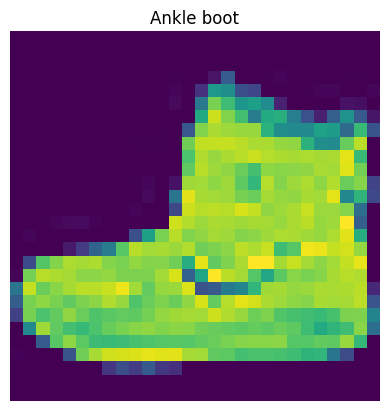

In [9]:
plt.imshow(image.squeeze());
plt.title(classes[label]);
plt.axis(False);


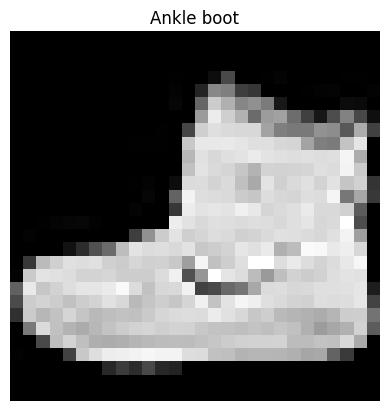

In [10]:
plt.imshow(image.squeeze(), cmap='grey');
plt.title(classes[label]);
plt.axis(False);


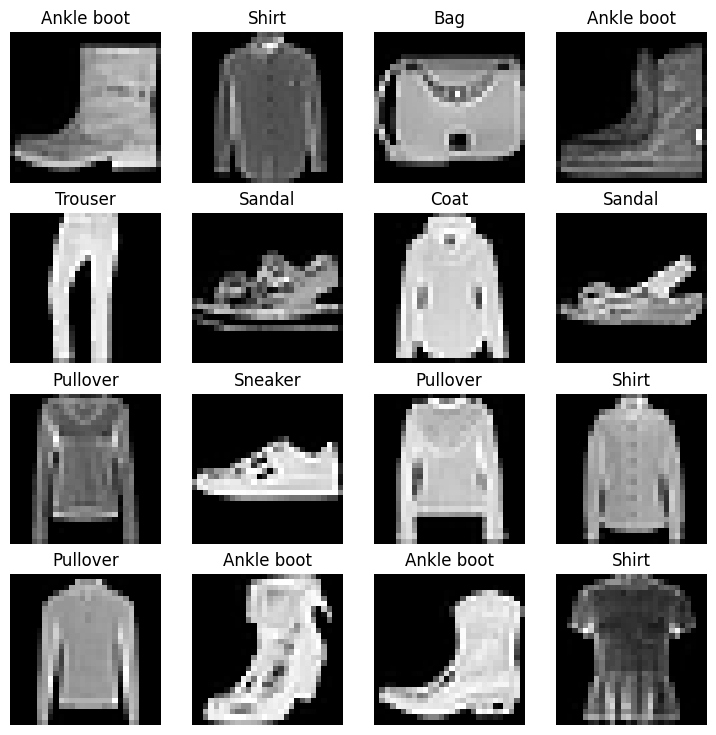

In [11]:
# plotting a subset of images from the dataset
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
row , col = 4, 4
for i in range(1, row*col + 1):
    randindx = torch.randint(low = 0, high= len(train_data),  size=[1]).item()
    img , label = train_data[randindx]
    fig.add_subplot(row, col, i)
    plt.imshow(img.squeeze(), cmap='grey')
    plt.title(classes[label])
    plt.axis(False);


## Dataloader


In [12]:
train_data, test_data


(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: /home/shushanksingh/work/pytroch-deep-learning/Data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: /home/shushanksingh/work/pytroch-deep-learning/Data
     Split: Test
     StandardTransform
 Transform: ToTensor())

So write now our data is in pytroch datasets but we need it to convert it into dataloader       
A Dataloader load the data into the model in batches (min-batches)  
Batches : it more computationally efficient and it gives our neural network chances to update its gradients per epoch

In [13]:
from torch.utils.data import DataLoader


BATCH_SIZE = 32 

train_dataloader = DataLoader(
    dataset= train_data, 
    shuffle=True, 
    batch_size= BATCH_SIZE,
    drop_last= True
)


test_dataloader = DataLoader(
    dataset = test_data,
    batch_size= BATCH_SIZE, 
    shuffle = False
)


In [14]:
print(f'Dataloaders: {train_dataloader, test_dataloader}')
print(f"Length of training dataloader: {len(train_dataloader)} of batch size {BATCH_SIZE}")
print(f"Length of training dataloader: {len(test_dataloader)} of batch size {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f05d02630a0>, <torch.utils.data.dataloader.DataLoader object at 0x7f05d0263370>)
Length of training dataloader: 1875 of batch size 32
Length of training dataloader: 313 of batch size 32


In [15]:
# what inside our data loader 
train_features_batch, train_label_batch = next(iter(train_dataloader))  # converted the loader into iterable and getting the next 
# as our dataloader contains 1872 iterables 

print(train_features_batch.shape, train_label_batch.shape)

# [32, 1, 28, 28] - batch_size, color channel, height, width


torch.Size([32, 1, 28, 28]) torch.Size([32])


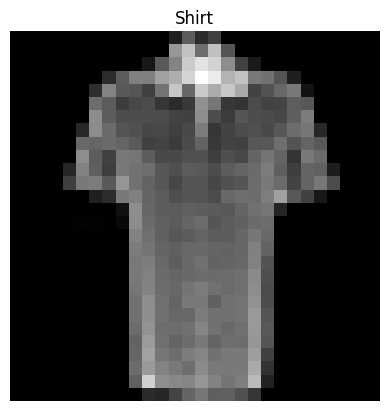

In [16]:
torch.manual_seed(42)
randomIdx = torch.randint(0, len(train_features_batch), [1]).item()
img, label = train_features_batch[randomIdx], train_label_batch[randomIdx]
plt.imshow(img.squeeze(), cmap='grey');
plt.title(classes[label]);
plt.axis(False);


## Building model_0: baseline with two linear layers

A **baseline model** is one of the simplest models you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

Our baseline will consist of two [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers.

In [17]:
flatten = nn.Flatten()
x = train_features_batch[0]

output = flatten(x) # this internally does the forward pass 
print(f"Size of x: {x.shape}, and size of output: {output.shape}")
# x [1, 28, 28] and output = [1, 28*28] -> [1, 784]


Size of x: torch.Size([1, 28, 28]), and size of output: torch.Size([1, 784])


In [18]:
# Model

class FashionMNISTModel0(nn.Module):
    """
    Baseline neural network model for FashionMNIST classification.

    This model consists of:
    - A flattening layer to convert 2D image input into a 1D vector.
    - One hidden linear layer.
    - An output linear layer for classification.

    Args:
        input_features (int): Number of input features (e.g., 28*28 for 28x28 images).
        output_features (int): Number of output classes (e.g., 10 for FashionMNIST).
        hidden_units (int): Number of units in the hidden layer.

    Example:
        model = FashionMNISTModel0(input_features=784, output_features=10, hidden_units=10)
        output = model(torch.randn(32, 1, 28, 28))  # Forward pass with batch of 32 images
    """
    def __init__(
            self, 
            input_features: int, 
            output_features: int, 
            hidden_units: int
    ):
        super().__init__()
        # Sequential stack of layers:
        # 1. Flatten input from [batch, 1, 28, 28] to [batch, 784]
        # 2. Linear layer mapping input to hidden units
        # 3. Linear layer mapping hidden units to output classes
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )   
    
    def forward(self, x):
        """
        Forward pass of the model.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, 1, 28, 28].

        Returns:
            torch.Tensor: Output logits of shape [batch_size, output_features].
        """
        return self.layer_stack(x)


In [19]:
model_0 = FashionMNISTModel0(input_features=28*28,  # Image height*width
                             output_features=10, # Number of class 
                             hidden_units=10
                             ).to(DEVICE)
model_0


FashionMNISTModel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
def get_model_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())
    return total_params

total_params = get_model_parameters(model_0)
print(f"Total number of parameters in the model: {total_params}")


Total number of parameters in the model: 7960


In [21]:
# dummy_img = torch.rand([1, 1, 28, 28]).to(DEVICE)
# print(model_0(dummy_img).shape)


In [22]:
model_0.state_dict()


OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0296, -0.0084,  0.0328,  ...,  0.0093,  0.0135, -0.0188],
                      [-0.0354,  0.0187,  0.0085,  ..., -0.0001,  0.0115, -0.0008],
                      [ 0.0017,  0.0045,  0.0133,  ..., -0.0188,  0.0059,  0.0100],
                      ...,
                      [ 0.0273, -0.0344,  0.0127,  ...,  0.0283, -0.0011, -0.0230],
                      [ 0.0257,  0.0291,  0.0243,  ..., -0.0087,  0.0001,  0.0176],
                      [-0.0147,  0.0053, -0.0194,  ..., -0.0221,  0.0205, -0.0093]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([ 0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,
                       0.0163,  0.0069], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[-0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,
                        0.2847, -0.1495],
                      [ 0

## Loss function, optimizer, evaluations

In [23]:
import torchmetrics

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)
accuracy_fn = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(DEVICE)


## Timing function

In [24]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = 'cpu'):
    time = end -start 
    print(f"Time Taken on device {device}: {time:.3f} seconds")


## Training and Testing


In [25]:
from tqdm.auto import tqdm

EPOCHS = 3

# Set random seeds for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start timer to measure training time
train_time_start_on_gpu = timer()

for epoch in tqdm(range(EPOCHS)):
    print(f'epoch: {epoch}\n---------')

    training_loss = 0  # Accumulate training loss for the epoch
    for batch, (X, y) in enumerate(train_dataloader):
        # Move data to the target device (CPU or GPU)
        X, y = X.to(DEVICE), y.to(DEVICE)
        # Set model to training mode
        model_0.train()
        
        # Forward pass: compute predictions
        y_preds = model_0(X)

        # Compute loss for the batch
        loss = loss_fn(y_preds, y)
        training_loss += loss  # Accumulate batch loss

        # Zero the gradients before backward pass
        optimizer.zero_grad()

        # Backward pass: compute gradients
        loss.backward()

        # Update model parameters
        optimizer.step()

        # Print progress every 400 batches
        if batch % 400 == 0: 
            print(f'Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples')
    
    # Average training loss over all batches
    training_loss /= len(train_dataloader)

    # Evaluate on the test dataset
    test_loss, test_acc = 0, 0 
    model_0.eval()  # Set model to evaluation mode
    with torch.inference_mode():
        for X, y in test_dataloader:
            # Move test data to the target device
            X, y = X.to(DEVICE), y.to(DEVICE)

            # Forward pass: compute predictions
            y_test_preds = model_0(X)

            # Accumulate test loss
            test_loss += loss_fn(y_test_preds, y)

            # Accumulate test accuracy
            test_acc += accuracy_fn(y_test_preds.argmax(dim=1), y)
        
        # Average test loss and accuracy over all batches
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {training_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# End timer after training
train_time_end_on_gpu = timer()

# Print total training time
print_train_time(start=train_time_start_on_gpu, 
                 end=train_time_end_on_gpu, 
                 device=str(next(model_0.parameters()).device))


/home/shushanksingh/work/pytroch-deep-learning/.PTDL-venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
---------
Looked at 0/ 60000 samples


Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 33%|███▎      | 1/3 [00:09<00:18,  9.45s/it]


Train loss: 0.59484 | Test loss: 0.51635, Test acc: 0.82%

epoch: 1
---------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 67%|██████▋   | 2/3 [00:18<00:09,  9.09s/it]


Train loss: 0.47946 | Test loss: 0.48138, Test acc: 0.83%

epoch: 2
---------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


100%|██████████| 3/3 [00:27<00:00,  9.16s/it]


Train loss: 0.45703 | Test loss: 0.47773, Test acc: 0.83%

Time Taken on device cuda:0: 27.475 seconds


## Make Predictions and Get results 

In [26]:
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               accuracy: torchmetrics.Accuracy, 
               loss_fn: torch.nn.Module,
               device: torch.device = 'cpu', 
               pretty_print: bool = True) -> dict:
    """
    Evaluates a PyTorch model on a given dataset and optionally prints the results in a pretty format.

    Args:
        model (torch.nn.Module): The model to evaluate.
        data_loader (torch.utils.data.DataLoader): DataLoader providing the evaluation dataset.
        accuracy (torchmetrics.Accuracy): TorchMetrics accuracy object to compute accuracy.
        loss_fn (torch.nn.Module): Loss function used to calculate model loss.
        device (torch.device, optional): Device to run evaluation on ('cpu' or 'cuda'). Default is 'cpu'.
        pretty_print (bool, optional): If True, prints the evaluation results in a formatted style. 
                                       If False, returns the results as a dictionary.

    Returns:
        dict: A dictionary containing model class name, average loss, accuracy, and device used,
              only if pretty_print is False. If pretty_print is True, results are printed and None is returned.
    """

    # Move model to the specified device and set it to evaluation mode
    model.to(device)
    model.eval()

    # Reset accuracy metric at the beginning of evaluation
    accuracy.reset()

    # Initialize total loss accumulator
    total_loss = 0.0

    # Disable gradient calculation for memory efficiency and speed during inference
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Move inputs and targets to the specified device
            X, y = X.to(device), y.to(device)

            # Forward pass: compute predictions
            preds = model(X)

            # Compute loss for the batch and accumulate it
            loss = loss_fn(preds, y)
            total_loss += loss.item()

            # Update the accuracy metric using predicted and actual labels
            accuracy.update(preds.argmax(dim=1), y)

    # Calculate average loss over all batches
    avg_loss = total_loss / len(data_loader)

    # Compute final accuracy
    final_acc = accuracy.compute()

    # Pack results into a dictionary
    result = {
        "model class Name": model.__class__.__name__,
        "loss": avg_loss,
        "acc": final_acc.item(),
        "device": str(device)
    }

    # Define a formatted string for pretty printing
    pretty = (
        "\n📊 Evaluation Results\n"
        "----------------------------\n"
        f"🧠 Model Class : {result['model class Name']}\n"
        f"💻 Device      : {result['device']}\n"
        f"🔢 Accuracy    : {result['acc'] * 100:.2f}%\n"
        f"📉 Loss        : {result['loss']:.4f}\n"
    )

    # Print the results prettily or return the raw result dictionary
    if pretty_print:
        print(pretty)
    
    return result


In [27]:
eval_model(model=model_0, 
           data_loader=test_dataloader, 
           accuracy=accuracy_fn, 
           loss_fn=loss_fn, 
           device=DEVICE)


 56%|█████▌    | 176/313 [00:00<00:00, 290.62it/s]

100%|██████████| 313/313 [00:01<00:00, 289.43it/s]


📊 Evaluation Results
----------------------------
🧠 Model Class : FashionMNISTModel0
💻 Device      : cuda
🔢 Accuracy    : 83.48%
📉 Loss        : 0.4777



{'model class Name': 'FashionMNISTModel0',
 'loss': 0.4777319543658735,
 'acc': 0.8348000049591064,
 'device': 'cuda'}

## Building a Better model with non-linearity

In [28]:
import torch
from torch import nn

class FashionMNISTModelV1(nn.Module):
    """
    A simple feedforward neural network for classifying images from the FashionMNIST dataset.

    Architecture:
        - Input layer: Flattens 2D image into 1D vector
        - Hidden layer: Fully connected Linear layer with ReLU activation
        - Output layer: Fully connected Linear layer with ReLU activation (not typical for final layer)
    
    Args:
        input_features (int): Number of input features (e.g., 28*28 for FashionMNIST)
        output_features (int): Number of output classes (e.g., 10 for FashionMNIST)
        hidden_units (int): Number of neurons in the hidden layer
    """
    def __init__(self, input_features, output_features, hidden_units):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # Flatten input image from (1, 28, 28) to (1, 784)
            nn.Linear(in_features=input_features, out_features=hidden_units),  # Hidden layer
            nn.ReLU(),  # Activation for hidden layer
            nn.Linear(in_features=hidden_units, out_features=output_features),  # Output layer
            # nn.ReLU()  # Activation after output layer (uncommon; consider removing for classification)
        )

    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 1, 28, 28)

        Returns:
            torch.Tensor: Output tensor of class scores (logits or activations)
        """
        return self.layer_stack(x)


In [29]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(
    input_features=28*28,
    output_features=len(classes),
    hidden_units=8
).to(DEVICE)

model_1


FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [30]:
print(next(model_1.parameters()).device)
get_model_parameters(model_1)


cuda:0


6370

## Loss, optimizer and accuracy function

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)
accuracy_fn = torchmetrics.Accuracy(task="multiclass", num_classes=len(classes)).to(device=DEVICE)
print(loss_fn)
print(optimizer)
print(accuracy_fn)


CrossEntropyLoss()
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
MulticlassAccuracy()


## Training and testing functions

In [32]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_function: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               accuracy: 'torchmetrics.Accuracy',
               device: torch.device):
    """
    Performs a single training epoch on the given dataloader.

    Args:
        model (torch.nn.Module): The neural network model to train.
        dataloader (torch.utils.data.DataLoader): DataLoader for training data.
        loss_function (torch.nn.Module): Loss function to optimize.
        optimizer (torch.optim.Optimizer): Optimizer for updating model parameters.
        accuracy (torchmetrics.Accuracy): Accuracy metric for evaluation.
        device (torch.device): The device (CPU/GPU) to run training on.

    Returns:
        None. Prints loss and accuracy for the epoch.
    """
    model.to(device)
    model.train()  # Set model to training mode
    accuracy.reset()
    
    total_loss = 0.0

    # Iterate over each batch
    for batch, (X, y) in enumerate(dataloader):
        # Move data to the specified device
        X, y = X.to(device), y.to(device)

        # Forward pass
        preds = model(X)

        # Compute loss
        batch_loss = loss_function(preds, y)
        total_loss += batch_loss.item()  # Accumulate scalar loss

        # Update accuracy metric
        accuracy.update(preds.argmax(dim=1), y)

        # Zero previous gradients
        optimizer.zero_grad()

        # Backward pass
        batch_loss.backward()

        # Update parameters
        optimizer.step()

    # Compute average loss and final accuracy for the epoch
    avg_loss = total_loss / len(dataloader)
    acc = accuracy.compute()

    print(f"Training Loss: {avg_loss:.3f} | Training Accuracy: {acc:.3f}")


def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy: torchmetrics.Accuracy, 
              device: torch.device):
    """
    Evaluates the model on a test/validation dataset.

    Args:
        model (torch.nn.Module): Trained model to evaluate.
        dataloader (torch.utils.data.DataLoader): DataLoader for test/validation data.
        loss_fn (torch.nn.Module): Loss function used for evaluation.
        accuracy (torchmetrics.Accuracy): Accuracy metric object to track performance.
        device (torch.device): Device to perform evaluation on (CPU or GPU).

    Returns:
        None. Prints the average loss and accuracy over the test dataset.
    """
    model.to(device)
    model.eval()  # Set model to evaluation mode
    accuracy.reset()
    total_loss = 0.0

    with torch.inference_mode():  # Disable gradient computation for evaluation
        for X, y in dataloader:
            # Move data to the specified device
            X, y = X.to(device), y.to(device)

            # Forward pass
            preds = model(X)

            # Compute and accumulate loss
            loss = loss_fn(preds, y)
            total_loss += loss.item()  # Get scalar value for averaging

            # Update accuracy metric
            accuracy.update(preds.argmax(dim=1), y)

    # Calculate average loss and accuracy over the entire dataloader
    avg_loss = total_loss / len(dataloader)
    acc = accuracy.compute()

    print(f"Testing Loss: {avg_loss:.3f} | Testing Accuracy: {acc:.3f}")


## NOTES


Why this = **accuracy: 'torchmetrics.Accuracy'**

The reason for the quotes ('...') is to delay the evaluation of the type annotation. This is known as a forward reference.

📌 Why it’s used here:

When writing type annotations, Python normally expects the type to already be defined in the current scope at the time of parsing. But sometimes, that type:
	•	hasn’t been imported yet, or
	•	is optional (e.g. part of a package that might not always be installed),
	•	or causes circular import issues.

Wrapping the type in quotes tells Python:
“Don’t evaluate this annotation right now — just treat it as a string for now.”

This is useful in two cases:

⸻

✅ 1. If you haven’t imported torchmetrics.Accuracy

If you’re using:

`accuracy: torchmetrics.Accuracy`  # ← This will cause a NameError if torchmetrics isn't imported

But you haven’t done:

`import torchmetrics`

Then using quotes like:

`accuracy: 'torchmetrics.Accuracy'`

avoids the error and still works with type checkers like mypy, editors like VS Code, etc.

⸻

✅ 2. For Python versions < 3.10

Before Python 3.10, forward references (like using a class or type before it’s defined) required strings. Since you’re possibly writing compatible code, this is still a common pattern.

⸻

✅ Modern alternative for Python 3.7+

Instead of using strings, Python 3.7+ supports:

`from __future__ import annotations`

This allows you to write:

`accuracy: torchmetrics.Accuracy`

without quotes, even if the type is defined later. It treats all annotations as string-like behind the scenes.

⸻

✔ TL;DR:
	•	`'torchmetrics.Accuracy'` is a forward reference to avoid errors if the type isn’t available at parse time.
	•	You can remove the quotes if you import torchmetrics first and use Python ≥ 3.7.
	•	Use `from __future__ import annotations` (Python ≥ 3.7) to avoid quotes entirely.


## Training and testing loop for model_1

In [33]:
# torch.manual_seed(42)

# model_1 = FashionMNISTModelV1(
#     input_features=28*28,
#     output_features=len(classes),
#     hidden_units=8
# ).to(DEVICE)

# model_1


In [34]:
torch.manual_seed(42)

EPOCHS = 3 

train_time_start_on_gpu = timer()

for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}/{EPOCHS}\n ---------------")
    model_1.train()
    train_step(
        model= model_1, 
        dataloader= train_dataloader, 
        loss_function= loss_fn, 
        optimizer = optimizer, 
        accuracy= accuracy_fn, 
        device= DEVICE
    )

    test_step(
        model= model_1, 
        dataloader= test_dataloader, 
        loss_fn=loss_fn, 
        accuracy= accuracy_fn, 
        device= DEVICE
    )
    print("")

train_time_end_on_gpu = timer()

total_train_time_on_gpu = print_train_time(start = train_time_start_on_gpu,
                                           end= train_time_end_on_gpu,
                                           device = DEVICE)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0/3
 ---------------


Training Loss: 0.660 | Training Accuracy: 0.759


 33%|███▎      | 1/3 [00:09<00:19,  9.79s/it]

Testing Loss: 0.529 | Testing Accuracy: 0.808

Epoch: 1/3
 ---------------
Training Loss: 0.496 | Training Accuracy: 0.821


 67%|██████▋   | 2/3 [00:19<00:09,  9.68s/it]

Testing Loss: 0.490 | Testing Accuracy: 0.824

Epoch: 2/3
 ---------------
Training Loss: 0.475 | Training Accuracy: 0.828


100%|██████████| 3/3 [00:29<00:00,  9.69s/it]

Testing Loss: 0.530 | Testing Accuracy: 0.814

Time Taken on device cuda: 29.062 seconds


## Model_1 eval

In [35]:
eval_model(model=model_1, data_loader=test_dataloader, accuracy=accuracy_fn, loss_fn=loss_fn, device=DEVICE)


 19%|█▉        | 60/313 [00:00<00:00, 290.28it/s]

100%|██████████| 313/313 [00:01<00:00, 282.74it/s]


📊 Evaluation Results
----------------------------
🧠 Model Class : FashionMNISTModelV1
💻 Device      : cuda
🔢 Accuracy    : 81.42%
📉 Loss        : 0.5298



{'model class Name': 'FashionMNISTModelV1',
 'loss': 0.529769456543671,
 'acc': 0.8141999840736389,
 'device': 'cuda'}

**In this case adding non-linearity made our model worse than the baseline model**

baseline model(model_0) eval

📊 Evaluation Results   
----------------------------      
🧠 Model Class : FashionMNISTModel0     
💻 Device      : cuda   
🔢 Accuracy    : 83.48%     
📉 Loss        : 0.4777     


📊 Evaluation Results       
----------------------------        
🧠 Model Class : FashionMNISTModelV1        
💻 Device      : cuda       
🔢 Accuracy    : 81.42%     
📉 Loss        : 0.5298     

## Building a Convonutional Neural Network(CNN)

CNN are also knows as ConvNets. They are know for there capabilities to find patterns in visual data

**Some Reference Links:**

1. [Cnn Explainer - poloclub](https://poloclub.github.io/cnn-explainer/) 
2. [TinyVGG](https://tinyvgg.streamlit.app/#tinyvgg-architecture)

TinyVGG arch:       
The TinyVGG architecture is a convolutional neural network (CNN) model that strikes a balance between simplicity and effectiveness in image classification tasks. This architecture consists of a total of 8 layers, including 6 convolutional layers and 2 fully connected layers. At the beginning of the network, the input layer accepts images of size 32x32 pixels with 3 color channels (RGB). The convolutional layers extract features from the input images, each followed by a rectified linear unit (ReLU) activation function. Max pooling layers are applied after every two convolutional layers to reduce the spatial dimensions of the feature maps using 2x2 filters with a stride of 2. The final two layers of the architecture are fully connected layers. The first fully connected layer has 256 neurons, followed by a second fully connected layer with 10 neurons, corresponding to the 10 classes in the CIFAR-10 dataset, on which the architecture was originally trained. The output layer of the network uses a softmax activation function to output class probabilities for the input image. The architecture is implemented using the TensorFlow/Keras framework, with additional layers such as batch normalization and dropout included to improve model performance and generalization.

![tinyVGG_arch](../img/tinyVGG_arch.png)

In [36]:
class FashionMNISTModelV3(nn.Module):
    """We will be implementing the TinyVGG arch"""
    def __init__(self, input_features, output_features, hidden_units):
        super().__init__()
        self.block_1 = nn.Sequential(
            # nn.Conv2d - this is for 2-d data as we have height and width for image we also have
            # nn.Conv1d adn nn.Conv3d 
            # Values [kernel_size, stride, padding] which we can set are called hyperparameters

            nn.Conv2d(
                in_channels= input_features,
                out_channels=hidden_units,
                kernel_size=3, 
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3, 
                stride=1, 
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units, 
                out_channels=hidden_units, 
                kernel_size= 3, 
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units, 
                out_channels=hidden_units,
                kernel_size=3, 
                stride=1, 
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.classifier_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units, 
                      out_features=output_features)
        )


    def forward(self, x):
        x = self.block_1(x)
        print(x.shape)
        x = self.block_2(x)
        print(x.shape)
        x = self.classifier_layer(x)
        return x 


In [37]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV3(
    input_features=3, 
    output_features=10, 
    hidden_units=10
).to(DEVICE)

model_2


FashionMNISTModelV3(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Dummy data experiment to understand the CNN

In [38]:
torch.manual_seed(42)

dummy_image = torch.rand((32, 3, 64, 64))
print(f"Image shape in a Batch: {dummy_image[0].shape}")


Image shape in a Batch: torch.Size([3, 64, 64])


**KERNEL SIZE**

![Kernel](../img/Kernel.png)

Often referred to as filter size, refers to the dimensions of the sliding window over the input.    
Choosing this hyperparameter has the massive impact on the image classification task.   
For example: small kernel size are able to extract much more large amount of information containing highly local features   
from the input. small kernel will result in a smaller reduction in layer dimensions, which allows for a deeper architectures    

Conversely a large kernel size extracts less information, which leads to a faster reduction in layer dimensions, often leading to worse performance.    
Larger kernel are better suited to extract features that are larger. 



---------
**PADDING**

![Padding](../img/padding.png)

Often necessary when the kernel extends beyond the activation map. Padding conserves data at the borders of     
activation maps, which leads to better performance, and it can help preserve the input's spatial size, which        
allows an architecture designer to build deeper, higher performing networks. There exist many padding       
techniques, but the most commonly used approach is zero-padding because of its performance, simplicity, and             
computational efficiency. The technique involves adding zeros symmetrically around the edges of an input. This      
approach is adopted by many high-performing CNNs such as AlexNet.       



----------
**STRIDE**


Stride indicates how many pixels the kernel should be shifted over at a time. For example, as described in the      
convolutional layer example above, Tiny VGG uses a stride of 1 for its convolutional layers, which means that       
the dot product is performed on a 3x3 window of the input to yield an output value, then is shifted to the right        
by one pixel for every subsequent operation. The impact stride has on a CNN is similar to kernel size. As stride        
is decreased, more features are learned because more data is extracted, which also leads to larger output       
layers. On the contrary, as stride is increased, this leads to more limited feature extraction and smaller      
output layer dimensions. One responsibility of the architecture designer is to ensure that the kernel slides        
across the input symmetrically when implementing a CNN. Use the hyperparameter visualization above to alter     
stride on various input/kernel dimensions to understand this constraint 



In [39]:
conv2d = nn.Conv2d(
    in_channels = 3, # number of input color channels
    out_channels= 10, # number of classes
    kernel_size=3, # this kernel 3 means it is (3,3) we can also write it as (3,3)
    stride =1, 
    padding=1
)
print(conv2d)
print(dummy_image.shape)


Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([32, 3, 64, 64])


In [40]:
conv2d_output = conv2d(dummy_image)
conv2d_output.shape

# some calculations 
# our image size is ([3, 64, 64])
# our model hyperparameters: Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
# a padding of one means (64+2, 64+2) = (66,66) this is our new image size 
# this means (64, 64) will be seen by (3,3) and single output will be given for this 
# so how to know what will be output shape

# (66-3 +1) -> (image_size - kernel_size + 1) = output_size
# test-2: Conv2d(3, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
# now we have image size (66,66)
# output should be 66-2(kernel_size) + 1 = (65, 65) yup seem to be correct but this is not considering the stride's we
# have taken into consideration padding but not stride 


torch.Size([32, 10, 64, 64])

### The formula for calculating the output size of a 2D convolutional layer




🧠 Step-by-Step: How the formula originates

Imagine you have a 1D input (for simplicity), and you want to slide a kernel across it. The same logic applies to both height and width in 2D.

Variables involved:
	•	Input size: I
	•	Kernel size: K
	•	Padding: P
	•	Stride: S
	•	Dilation: D

🔸 First, Adjust for Padding

Padding adds pixels to the border of the input. So the effective input size becomes:

$$I_{\text{effective}} = I + 2P$$

⸻

🔸 Second, Adjust for Dilation

Dilation increases the spacing between kernel elements. For a kernel of size K with dilation D, the effective kernel size is:

$$K_{\text{effective}} = D \cdot (K - 1) + 1$$

This is because:
	•	A normal 3x3 kernel covers 3 elements.
	•	With dilation 2, it spans 5 positions: 0, 2, 4

⸻

🔸 Third, How many times can you slide the kernel?

You’re asking: “How many times can I move the kernel over the padded input, with a given stride?”

The kernel starts at position 0 and keeps sliding by S until it no longer fully fits. That gives:

$$\text{Output size} = \left\lfloor \frac{I_{\text{effective}} - K_{\text{effective}}}{S} + 1 \right\rfloor$$

Substituting I + 2P and D(K - 1) + 1, you get:

$$\text{Output size} = \left\lfloor \frac{I + 2P - D \cdot (K - 1) - 1}{S} + 1 \right\rfloor$$

⸻

✅ Final Formula:

$$\boxed{
\text{Output size} = \left\lfloor \frac{\text{Input size} + 2 \cdot \text{Padding} - \text{Dilation} \cdot (\text{Kernel size} - 1) - 1}{\text{Stride}} + 1 \right\rfloor
}$$

⸻

🧩 Example Interpretation

Say you have:
	•	Input: 32
	•	Kernel: 3
	•	Padding: 1
	•	Stride: 1
	•	Dilation: 1

Plug into the formula:

$$\left\lfloor \frac{32 + 2 \cdot 1 - 1 \cdot (3 - 1) - 1}{1} + 1 \right\rfloor = \left\lfloor \frac{32 + 2 - 2 - 1}{1} + 1 \right\rfloor = \left\lfloor 31 + 1 \right\rfloor = 32$$


![conv-net-as-compression](../img/conv-net-as-compression.png)

In [41]:
# MaxPool2d 

maxpool2d = nn.MaxPool2d(kernel_size=2)
print(maxpool2d)



MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [42]:
maxpool_output = maxpool2d(conv2d_output)
maxpool_output.shape

# so we have 64 - I and then kernel of 2 and stride of 2 so it becomes (64 -  1*(2-1 ) -1)/ 2 = 32 


torch.Size([32, 10, 32, 32])

**lets try a dummy image with our FashionMNISTV3 model**

In [43]:
model_2


FashionMNISTModelV3(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=10, bias=True)
  )
)

torch.Size([1, 28, 28])


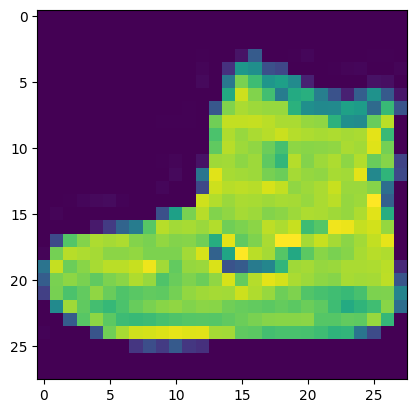

In [44]:
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze()); 

# will pass this image through our model_2 


In [45]:
def grayscale_to_rgb(image_tensor):
    """
    Converts a grayscale image tensor to an RGB image tensor.

    Args:
        image_tensor (torch.Tensor): A grayscale image tensor of shape (C, H, W) or (B, C, H, W),
                                     where C is 1, H is height, W is width, and B is batch size.

    Returns:
        torch.Tensor: An RGB image tensor of shape (3, H, W) or (B, 3, H, W).
    """
    if image_tensor.ndim == 3:  # Single image
        return image_tensor.repeat(3, 1, 1)
    elif image_tensor.ndim == 4:  # Batch of images
        return image_tensor.repeat(1, 3, 1, 1)
    else:
        raise ValueError("Input tensor must have 3 or 4 dimensions.")

rgb_tensor = grayscale_to_rgb(image)
rgb_tensor.shape


torch.Size([3, 28, 28])

In [46]:
# forward pass 
model_2(rgb_tensor.to(DEVICE))


torch.Size([10, 14, 14])
torch.Size([10, 7, 7])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x49 and 10x10)

In [47]:
# okay so the reason for above error is that in our classifier layer we have nn.flatten() 
# the block_2 layer give us the shape of 10, 7, 7 this is passed to the nn.flatten which gives us 
# 10, 49 as output_size but our linear layer is 10, 10 (10 hidden_units, 10 classes) 
# for matrix multiplication inner dimensions should match which doesn't 
# so how to fix this we can do it by changing the hidden_units for our linear-layer 
# 


## Fixed CNN Model- shape mismatch fix

In [48]:
class FashionMNISTModelV3(nn.Module):
    """We will be implementing the TinyVGG arch"""
    def __init__(self, input_features, output_features, hidden_units):
        super().__init__()
        self.block_1 = nn.Sequential(
            # nn.Conv2d - this is for 2-d data as we have height and width for image we also have
            # nn.Conv1d adn nn.Conv3d 
            # Values [kernel_size, stride, padding] which we can set are called hyperparameters

            nn.Conv2d(
                in_channels= input_features,
                out_channels=hidden_units,
                kernel_size=3, 
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3, 
                stride=1, 
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units, 
                out_channels=hidden_units, 
                kernel_size= 3, 
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units, 
                out_channels=hidden_units,
                kernel_size=3, 
                stride=1, 
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.classifier_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_features)
        )


    def forward(self, x):
        x = self.block_1(x)
        
        x = self.block_2(x)
        
        x = self.classifier_layer(x)
        return x 


In [49]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV3(
    input_features=3, 
    output_features=10, 
    hidden_units=10
).to(DEVICE)

model_2


FashionMNISTModelV3(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [50]:
model_2(rgb_tensor.unsqueeze(0).to(DEVICE))


tensor([[ 0.0043, -0.0754, -0.0439, -0.0204,  0.0119, -0.0186,  0.0190,  0.0716,
         -0.0267, -0.0134]], device='cuda:0', grad_fn=<AddmmBackward0>)

## Loss, Accuracy, Optimizer for CNN Model

In [51]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV3(
    input_features=1, 
    output_features=10, 
    hidden_units=10
).to(DEVICE)

model_2


FashionMNISTModelV3(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [52]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr = 0.1)
accuracy_fn = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(DEVICE)


## Training loop 


In [53]:
EPOCHS = 3

torch.manual_seed(42)

train_time_start = timer()

for epoch in tqdm(range(EPOCHS)):
    train_step(
        model=model_2,
        dataloader=train_dataloader,
        loss_function=loss_fn,
        optimizer=optimizer,
        accuracy=accuracy_fn,
        device=DEVICE
    )



train_time_end = timer()

total_time = print_train_time(start=train_time_start, end=train_time_end, device='gpu')


  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:10<00:21, 10.52s/it]

Training Loss: 0.595 | Training Accuracy: 0.784


 67%|██████▋   | 2/3 [00:20<00:10, 10.39s/it]

Training Loss: 0.361 | Training Accuracy: 0.869


100%|██████████| 3/3 [00:31<00:00, 10.40s/it]

Training Loss: 0.325 | Training Accuracy: 0.881
Time Taken on device gpu: 31.196 seconds


In [54]:
model_2_result = eval_model(model_2, test_dataloader, accuracy_fn, loss_fn, DEVICE)


 17%|█▋        | 54/313 [00:00<00:00, 260.46it/s]

100%|██████████| 313/313 [00:01<00:00, 255.74it/s]


📊 Evaluation Results
----------------------------
🧠 Model Class : FashionMNISTModelV3
💻 Device      : cuda
🔢 Accuracy    : 86.74%
📉 Loss        : 0.3641



## Compare model Results

In [55]:
model_1_result = eval_model(model_1, test_dataloader, accuracy_fn, loss_fn, DEVICE)
model_0_result = eval_model(model_0, test_dataloader, accuracy_fn, loss_fn, DEVICE)


 19%|█▊        | 58/313 [00:00<00:00, 287.70it/s]

100%|██████████| 313/313 [00:01<00:00, 284.17it/s]



📊 Evaluation Results
----------------------------
🧠 Model Class : FashionMNISTModelV1
💻 Device      : cuda
🔢 Accuracy    : 81.42%
📉 Loss        : 0.5298



100%|██████████| 313/313 [00:01<00:00, 284.32it/s]


📊 Evaluation Results
----------------------------
🧠 Model Class : FashionMNISTModel0
💻 Device      : cuda
🔢 Accuracy    : 83.48%
📉 Loss        : 0.4777



In [56]:
import pandas as pd

eval_result = pd.DataFrame([model_0_result, model_1_result, model_2_result])
eval_result


,model class Name,loss,acc,device
0,FashionMNISTModel0,0.477732,0.8348,cuda
1,FashionMNISTModelV1,0.529769,0.8142,cuda
2,FashionMNISTModelV3,0.364085,0.8674,cuda


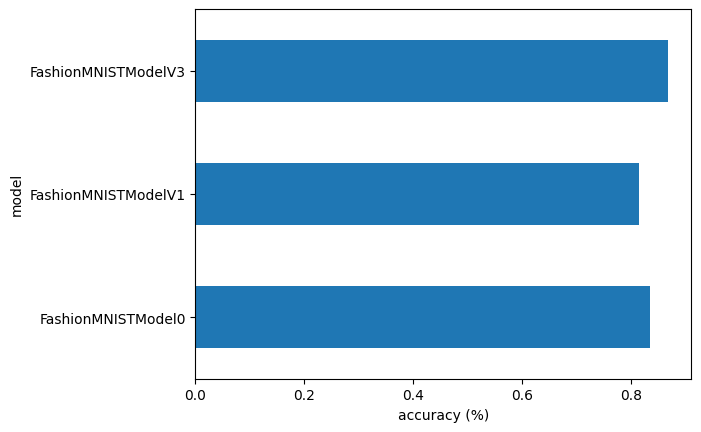

In [57]:
# Visualize our model results
eval_result.set_index("model class Name")["acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");


There is a trade off between model performance and speed

## Make prediction with best model

In [58]:
# getting random samples from the test dataset

import random 
random.seed(42)

test_sample = []
test_label = []

for img, label in random.sample(list(test_data), k=9):
    test_sample.append(img)
    test_label.append(label)

print(len(test_sample))
print(test_label)


9
[5, 1, 7, 4, 3, 0, 4, 7, 1]


In [59]:
test_sample[0].shape


torch.Size([1, 28, 28])

In [60]:
def make_predictions(model, data, device):
    model.to(device)
    model.eval()
    pred_probs = []
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device) # unsqueeze to add batch 
            logits = model(sample) # forward pass
            preds = torch.softmax(logits.squeeze(), dim=0) # removing the batch and getting the predictions
            pred_probs.append(preds.cpu())

    return torch.stack(pred_probs)



In [61]:
model_predictions = make_predictions(model_2, test_sample, DEVICE)
print(model_predictions.shape)
preds = model_predictions.argmax(dim=1)
preds


torch.Size([9, 10])


tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

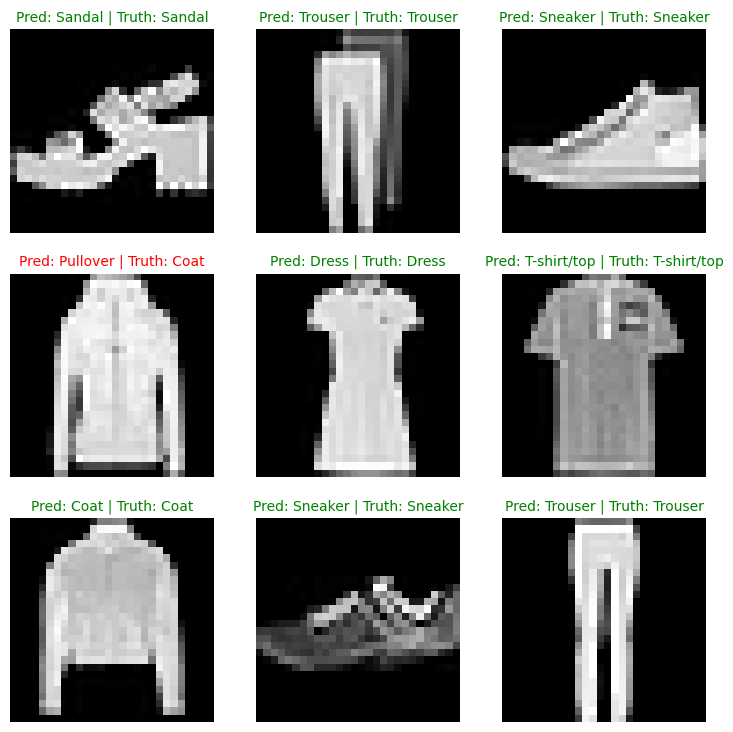

In [62]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_sample):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = classes[preds[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = classes[test_label[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);


## Confusion Matrix

In [64]:
def make_predictions(model, dataloader, device):
    predictions_list = []
    model.to(device)
    with torch.inference_mode():
        for X, y in tqdm(dataloader, desc="making predictions on the data ......"):
            X, y = X.to(device), y.to(device)
            logits = model(X)
            preds = torch.softmax(logits,dim=1).argmax(1)
            predictions_list.append(preds.cpu())
    return predictions_list

predictions = make_predictions(model = model_2, dataloader = test_dataloader, device=DEVICE)
predictions = torch.cat(predictions)


making predictions on the data ......:  18%|█▊        | 56/313 [00:00<00:00, 277.72it/s]

making predictions on the data ......: 100%|██████████| 313/313 [00:01<00:00, 295.22it/s]


In [66]:
!pip install mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.6 MB/s eta 0:00:00


In [72]:
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher


0.23.4


In [69]:
import torchmetrics
from mlxtend.plotting import plot_confusion_matrix


In [68]:
confusion_matrix = torchmetrics.ConfusionMatrix(task='multiclass', num_classes=10)

result = confusion_matrix(predictions, test_data.targets)


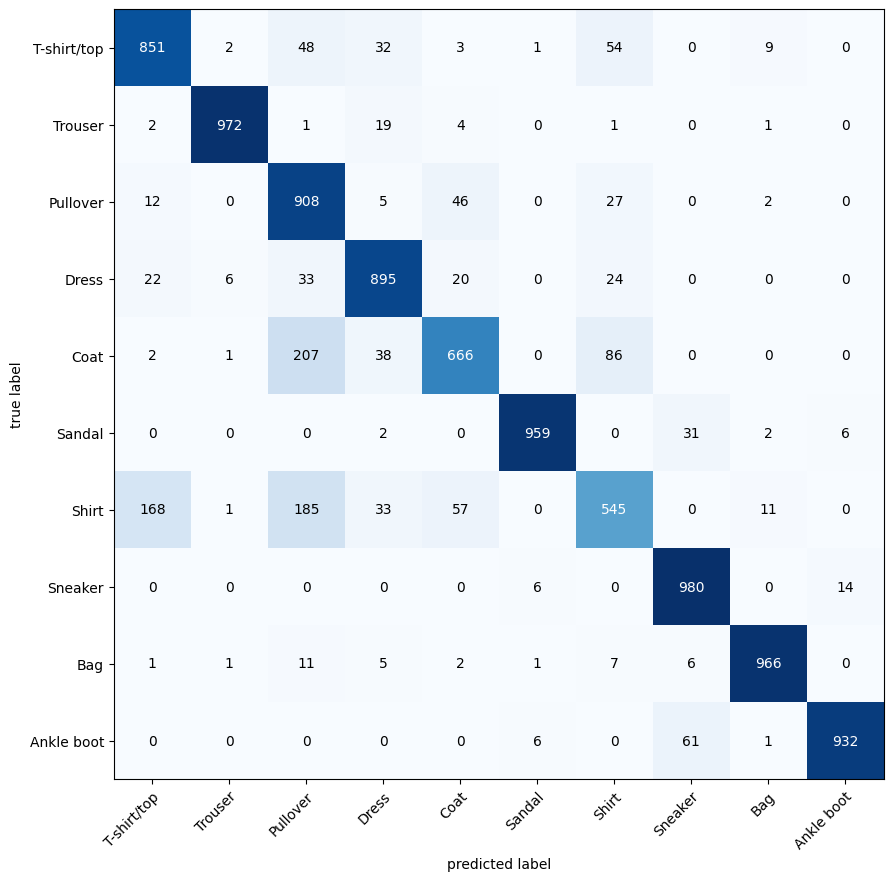

In [75]:
fig , ax = plot_confusion_matrix(conf_mat=result.numpy(), class_names=classes, figsize=(10, 10) );


**Observation**

This matrix shows where the model made wrong predictions and where it was correct 

we can see that model is confused around 207 images which are coat as pullover and same kind of issue is seen with shirt and T-shirts



## Saving Model and Loading

 we can save and load a PyTorch model using a combination of:
* `torch.save` - a function to save a whole PyTorch model or a model's `state_dict()`. 
* `torch.load` - a function to load in a saved PyTorch object.
* `torch.nn.Module.load_state_dict()` - a function to load a saved `state_dict()` into an existing model instance.


In [80]:
from pathlib import Path


In [ ]:
# Saving the complete model 

MODEL_PATH = Path("../Models")
MODEL_NAME = str(model_2.__class__.__name__)

SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f'Saving model {MODEL_NAME} at {SAVE_PATH}')

MODEL_PATH.mkdir(parents=True ,exist_ok=True)

torch.save(obj= model_2, f=SAVE_PATH)


Saving model FashionMNISTModelV3 at ../Models/FashionMNISTModelV3


In [89]:
# Saving the state_dict of the model

MODEL_PATH = Path("../Models")
MODEL_NAME = str(model_2.__class__.__name__)

SAVE_PATH = MODEL_PATH / f"{MODEL_NAME}_state_dict"
print(f'Saving model {MODEL_NAME} at {SAVE_PATH}')

MODEL_PATH.mkdir(parents=True ,exist_ok=True)

torch.save(obj= model_2.state_dict(), f=SAVE_PATH)


Saving model FashionMNISTModelV3 at ../Models/FashionMNISTModelV3_state_dict


In [91]:
# Saving model with state_dict means that you have to create a same model with same parameters again and then load the 
# saved state_dict into the model 

load_model_state_dict = FashionMNISTModelV3(
    input_features=1, 
    output_features= 10, 
    hidden_units= 10 
)


load_model_state_dict.load_state_dict(torch.load(f=SAVE_PATH)) 


<All keys matched successfully>

In [92]:
# Checking the state_dict model predictions with the existing model_2 predictions on the test dataset 

load_model_state_dict.to(device=DEVICE)
load_model_state_dict_preds = eval_model(load_model_state_dict, test_dataloader, accuracy=accuracy_fn, loss_fn=loss_fn, device=DEVICE)



100%|██████████| 313/313 [00:01<00:00, 277.29it/s]


📊 Evaluation Results
----------------------------
🧠 Model Class : FashionMNISTModelV3
💻 Device      : cuda
🔢 Accuracy    : 86.74%
📉 Loss        : 0.3641



In [93]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_result["loss"]), 
              torch.tensor(load_model_state_dict_preds["loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance



tensor(True)